In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotting import ScalogramPlotter
import os

In [13]:
dir = os.getcwd() + "/saved_data/a_coefficients_18_2_Feb10.npy"

In [15]:
a_coefs = np.load(dir, mmap_mode='r')

In [18]:
dimensions = [(i, i) for i in range(1, 17)]
dimensions

[(1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16)]

In [3]:
def process_epoch(dim, epoch, plotter):
    new_filename = f"scalogram_a_{dim[0]}x{dim[0]}"
    if plotter.average:
        scalogram = plotter.plot_average_scalogram(epoch)
    else:
        scalogram = plotter.plot_many(epoch)
    plotter.save_plot(filename=new_filename, fig=scalogram)

In [32]:
for dim in dimensions:
    print(list(range((dim[0])**2)))

[0]
[0, 1, 2, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 6

In [40]:
save_dir = "/Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/sample_scalograms"
epoch = np.load(dir, mmap_mode='r')[0]
for dim in dimensions:
    index_list = list(range((dim[0])**2))
    plotter = ScalogramPlotter(dimensions=dim, 
                               cmap='turbo',
                               data_dir=dir,
                               save_dir=save_dir,
                               index_list=index_list)
    
    process_epoch(dim, epoch, plotter)

plotting 0s for channel index: 247
plotting 0s for channel index: 248
plotting 0s for channel index: 249
plotting 0s for channel index: 250
plotting 0s for channel index: 251
plotting 0s for channel index: 252
plotting 0s for channel index: 253
plotting 0s for channel index: 254
plotting 0s for channel index: 255


In [3]:
dir = "/Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/BCOM_18_2_re_144_coefficients.npy"
coefs = np.load(dir, mmap_mode='r')
# def process_epoch_roi(roi, epoch, plotter):
#     new_filename = f"scalogram_a_roi{list(range(roi))}"
#     if plotter.average:
#         scalogram = plotter.plot_average_scalogram(epoch)
#     else:
#         scalogram = plotter.plot_many_roi(epoch)
#     plotter.save_plot(filename=new_filename, fig=scalogram)

In [4]:
plotter = ScalogramPlotter(
    dimensions=(1,1),
    cmap='turbo',
    data_dir=dir,
    save_dir=os.getcwd(),
    index_list=[0]
)

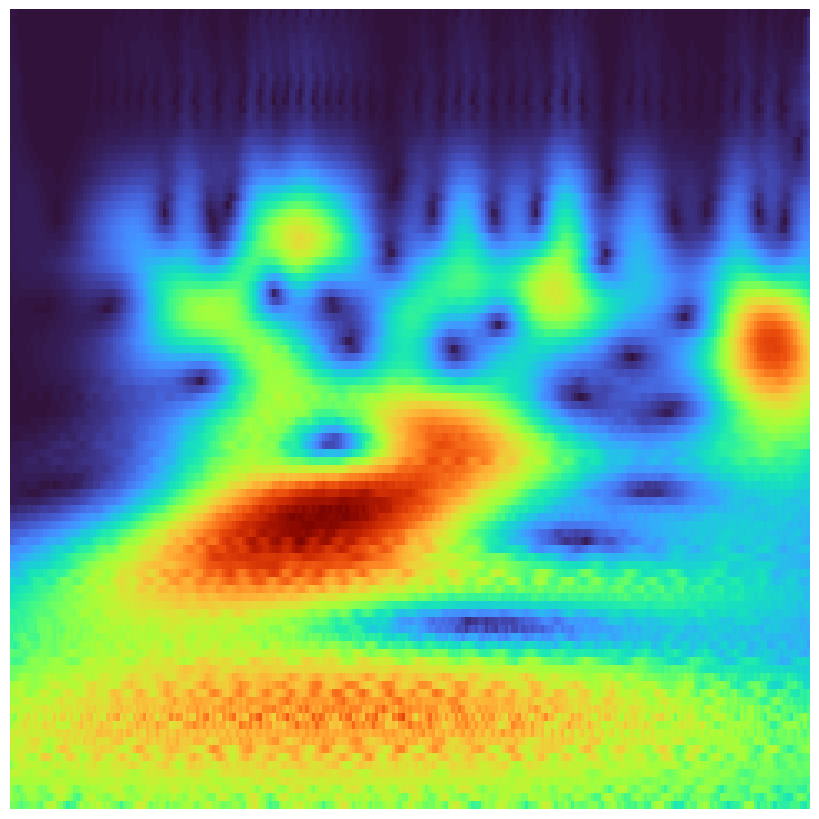

In [13]:
scalogram = plotter.plot_roi(coefficients=coefs[:, 7, :, :])

(4, 100, 241)
(4, 100, 241)
(4, 100, 241)
(4, 100, 241)
(4, 100, 241)
(4, 100, 241)
(4, 100, 241)
(4, 100, 241)


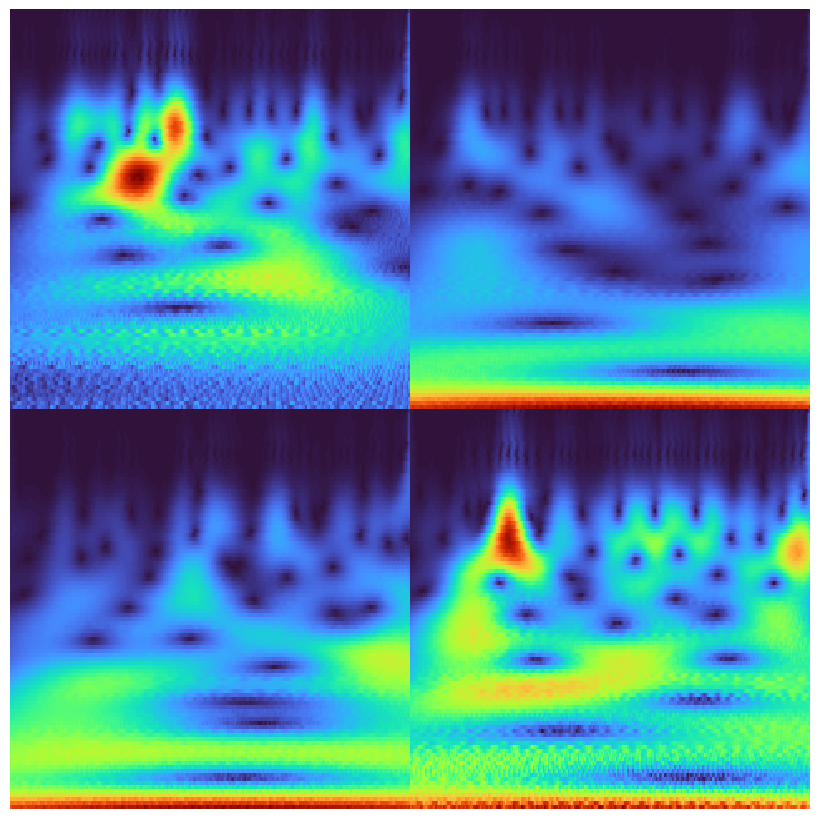

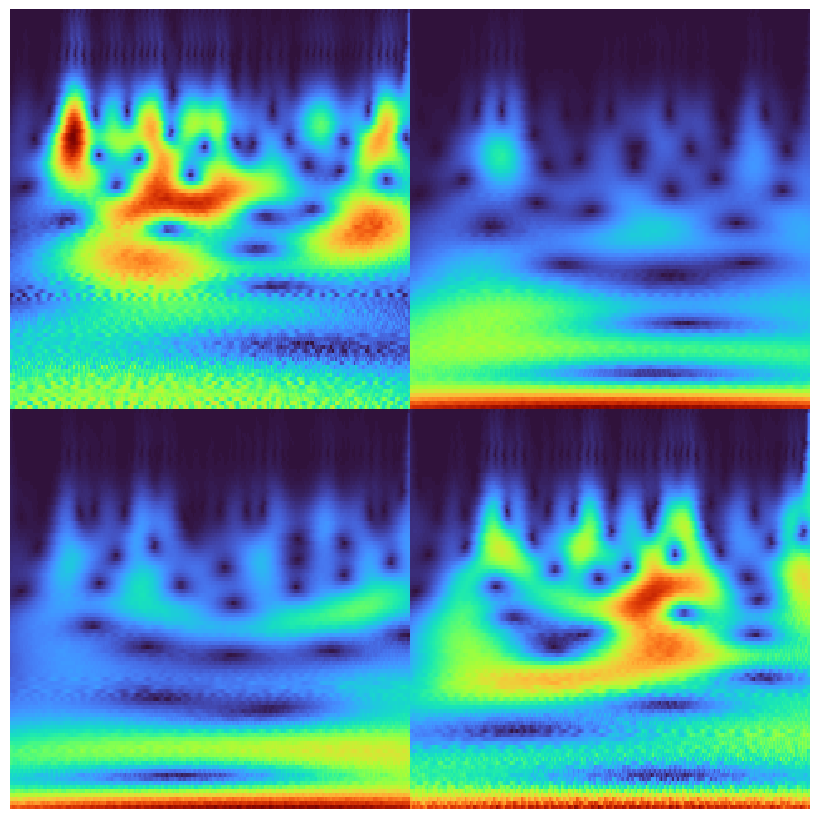

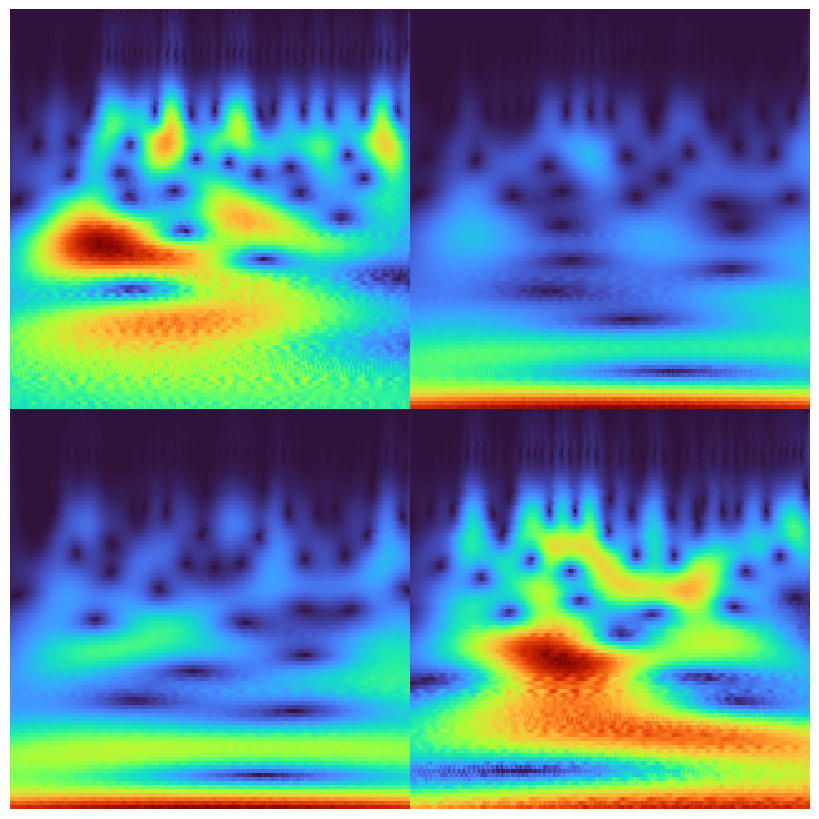

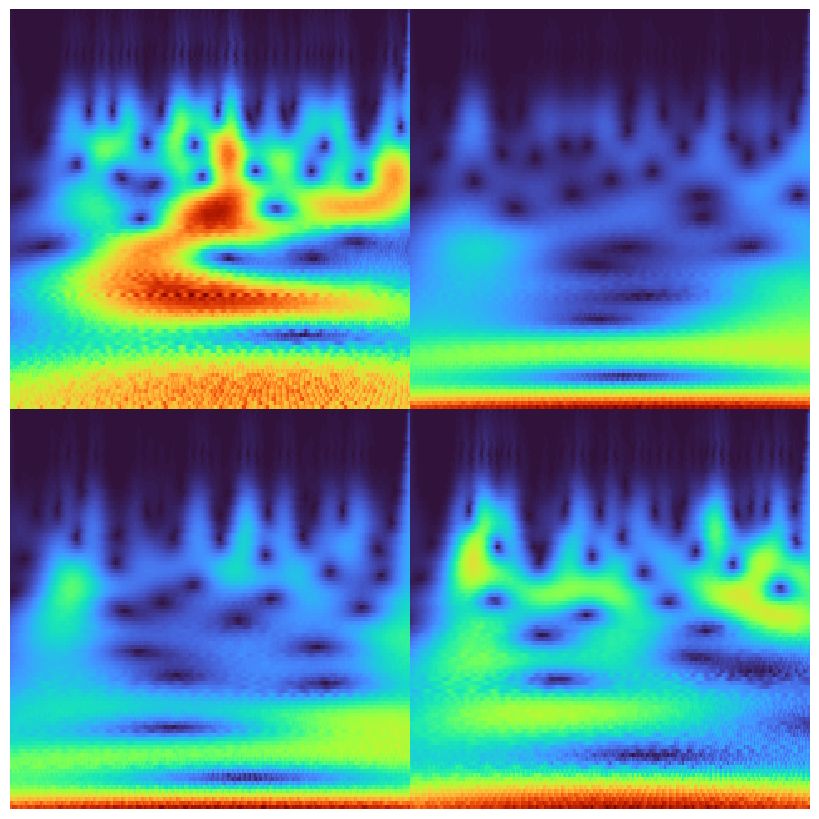

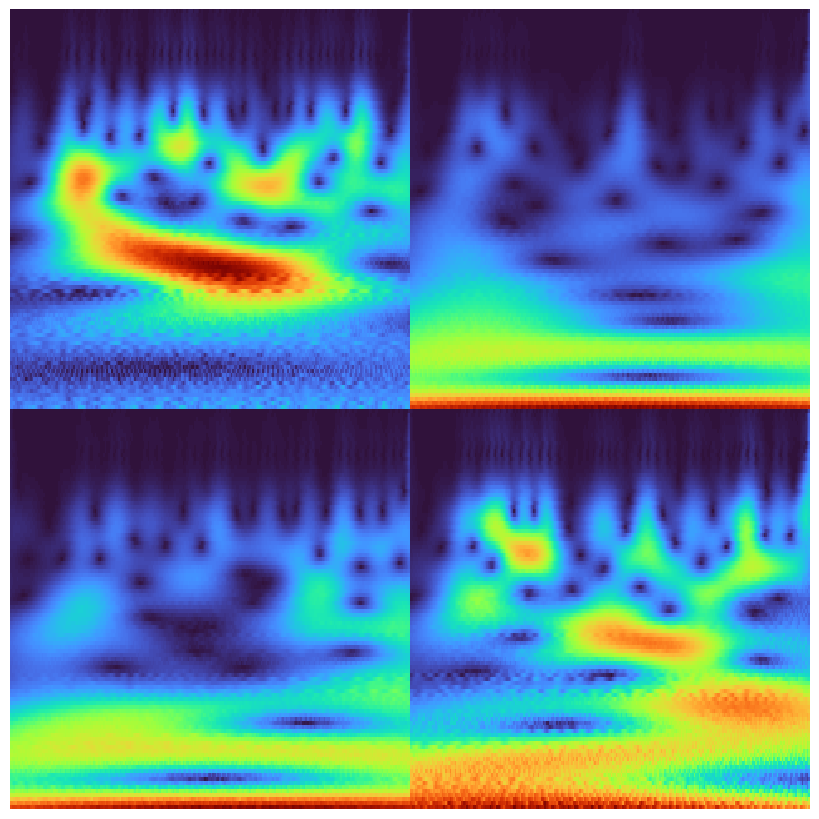

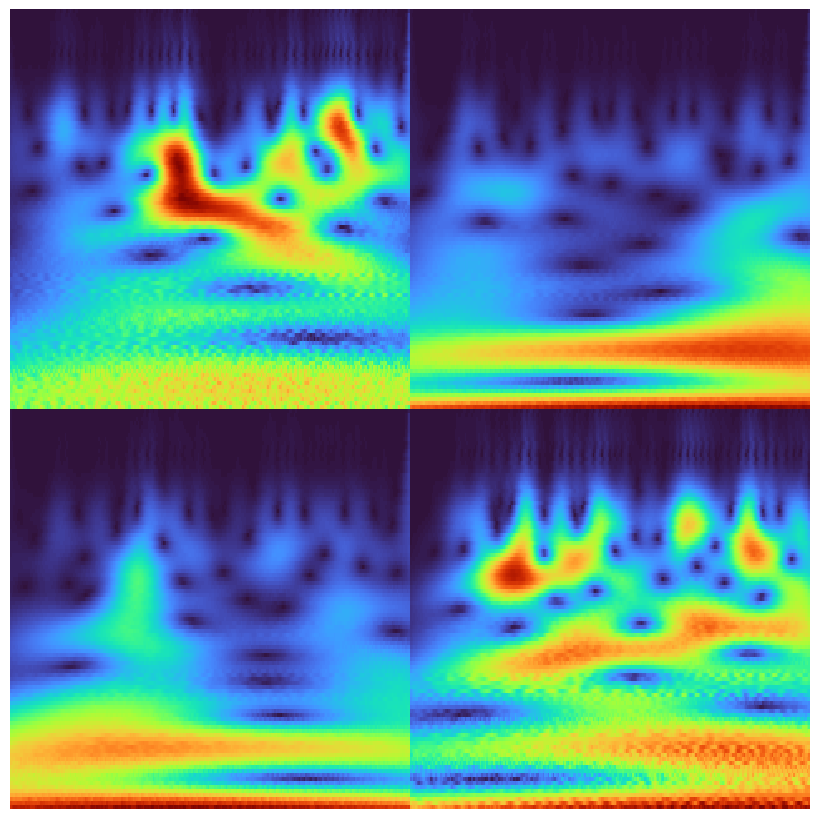

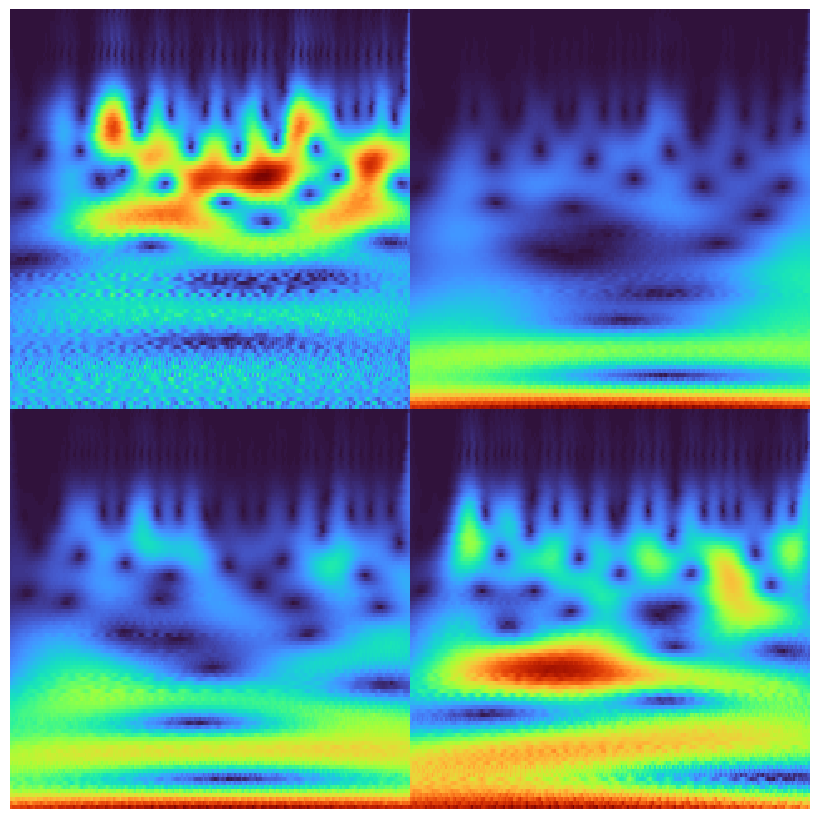

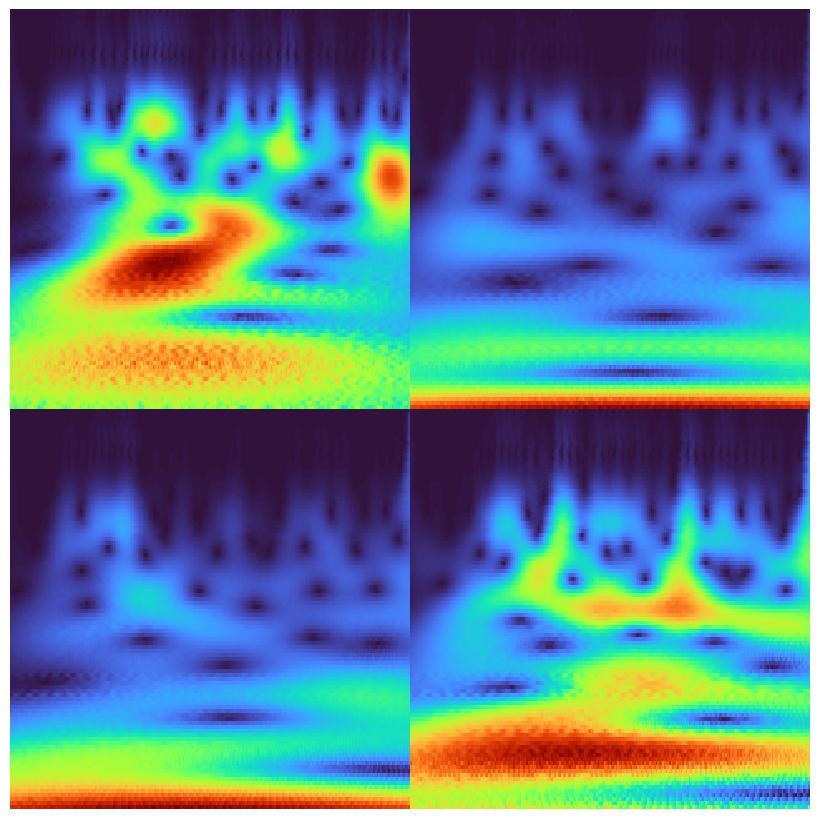

In [34]:

# I should split the data before, in the script, and just loop over epochs
roi_list = [0, 1, 2, 3]
for i in range(coefs.shape[1]):
    print(coefs[:, i, :, :].shape)
    fig, ax = plt.subplots(
        2,
        2,
        figsize= (8,8)
    )
    data=coefs[:, i, :, :]

    ax = np.array(ax, ndmin=2)
    subplot_index = 0
    for roi_index, roi in enumerate(data):
        if roi_index in roi_list:
            r, c = divmod(subplot_index, 2)
            ax[r, c].pcolormesh(roi, cmap='turbo')
            ax[r, c].set_xticks([])
            ax[r, c].set_yticks([])
            subplot_index += 1
    if subplot_index < 2 * 2:
        for roi_index in range(subplot_index, 2 * 2):
            print(f"plotting 0s for roi index: {roi_index}")
            r, c = divmod(roi_index, 2)
            ax[r, c].pcolormesh(np.zeros_like(roi), cmap='turbo')
            ax[r, c].set_xticks([])
            ax[r, c].set_yticks([])
                    #formatting
    for axes in ax.flatten():
        axes.spines['top'].set_visible(False)
        axes.spines['right'].set_visible(False)
        axes.spines['left'].set_visible(False)
        axes.spines['bottom'].set_visible(False)
    
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0)
    fig.patch.set_visible(False)
